In [1]:
#number_of_streamlines.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 11 July 2018.
#compare evolutions

In [2]:
#restore output
dirs = ['2/', '3/', '5/', '7/', '9/', '11/']
from helper_fns import *
everything = []
for dir in dirs:
    inputs_file = dir + 'inputs.py'
    execfile(inputs_file)
    output_folder = dir + output_folder
    r, t, vr, vt, times, lambda0 = restore_output(output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    viscous_timescale = (radial_width**2)/(12*shear_viscosity)
    print 'output_folder = ', output_folder
    print 'r.shape = ', r.shape
    times_viscous = times/viscous_timescale
    everything += [(r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous)]

output_folder =  2/output
r.shape =  (1001, 2, 241)
output_folder =  3/output
r.shape =  (1001, 3, 241)
output_folder =  5/output
r.shape =  (1001, 5, 241)
output_folder =  7/output
r.shape =  (1001, 7, 241)
output_folder =  9/output
r.shape =  (1001, 9, 241)
output_folder =  11/output
r.shape =  (1001, 11, 241)


In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np
import pandas as pd

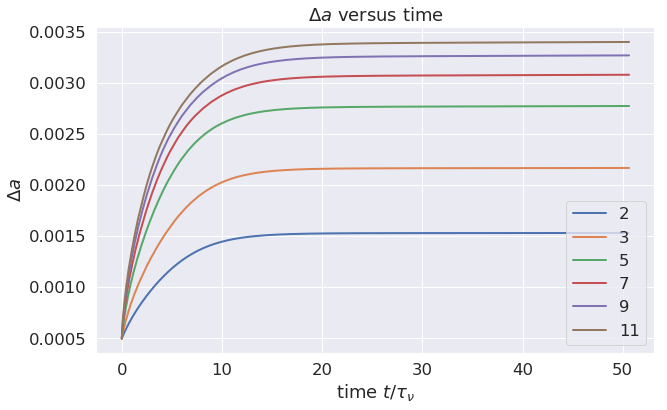

In [4]:
#plot delta_a versus time
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = r.shape
    a_inner = a[:, 0, :].mean(axis=1)
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    delta_a = a_outer - a_inner
    x = times_viscous
    y = delta_a
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=str(number_of_streamlines))
p = ax.set_title(r'$\Delta a$ versus time')
p = ax.set_ylabel(r'$\Delta a$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

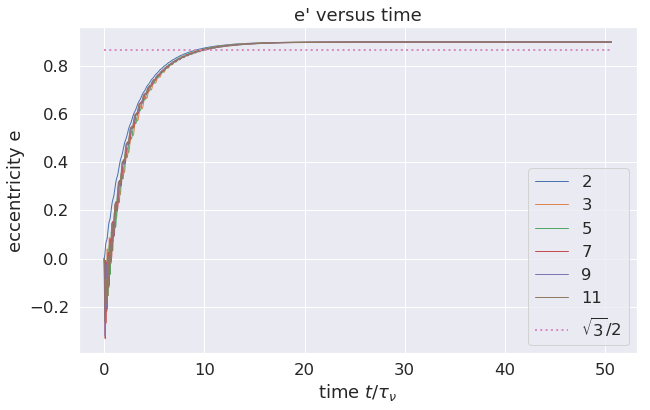

In [5]:
#plot e_prime versus time
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous = everything[idx]
    total_number_of_outputs, number_of_streamlines, particles_per_streamline = r.shape
    e_inner = e[:, 0, :].mean(axis=1)
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    delta_e = e_outer - e_inner
    a_inner = a[:, 0, :].mean(axis=1)
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    a_avg = (a_outer + a_inner)/2
    delta_a = a_outer - a_inner
    e_prime = a_avg*delta_e/delta_a
    linewidth = 2.5*(len(dirs)-idx)
    x = times_viscous
    y = e_prime
    p = ax.plot(x, y, linestyle='-', linewidth=1, label=dir[0:-1])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_title("e' versus time")
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend(loc='lower right')